# <center> 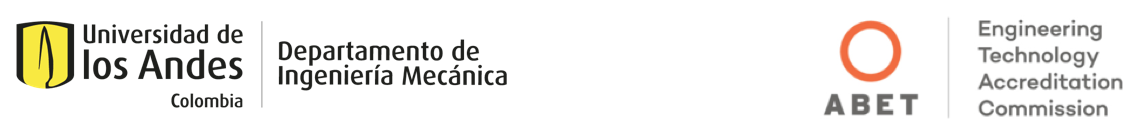
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 3-Cálculo Simbólico

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivodemostrar su manejo en el uso de símbolos para describir ecuaciones usando la librería sympy


### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller3_NombreApellido1_NombreApellido2.ipynb`.</font>
___

Una partícula se mueve en el plano 2D descrita por las siguientes ecuaciones, donde a es un parámetro constante:

<font size="6">$$x=a^{\frac{t}{\pi}}sin(t)   \; \; \; \; \; \; \; \; \; \;   y=a^{\frac{t}{\pi}}cos(t) $$  
</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Diferenciación

Encuentre una expresión para la magnitud de la velocidad de la partícula en función del tiempo. Recuerde que la velocidad es la derivada de la posición, respecto al tiempo.

In [41]:
import sympy as sp
from sympy import symbols 
from sympy import sin, cos, pi, sqrt

[t,a]=symbols("t,a")
x=a**(t/sp.pi)*sin(t)
y=a**(t/sp.pi)*cos(t)
dx=x.diff(t)
dy=y.diff(t)
mag=sp.sqrt(dx**2 + dy**2)
mag_s=mag.simplify()
mag_s




sqrt(a**(2*t/pi)*(log(a)**2 + pi**2))/pi

___
### <span style="color: #1AA3D9"><center> Item 2: Integración

Usando integración simbólica, encuentre una expresión para la distancia recorrida por la partícula en función del tiempo.

In [42]:
dis=sp.integrate(mag_s,t).simplify()
dis

Piecewise((sqrt(a**(2*t/pi)*(log(a)**2 + pi**2))/log(a), ((a >= 0) | (a > 1)) & ((a > 1) | (a < 1))), (t, True))

___
### <span style="color: #1AA3D9"><center> Item 3: Evaluación numérica

Definiendo  a=0.9  evalúe  la  posición  de  la  partícula  durante  los  primeros 100s  de movimiento. En una gráfica <font color="#1AA3D9">tipo subplot</font> presente:

1. Trayectoria de la partícula (x vs y)
2. Velocidad en el tiempo (||v||vs t)
3. Distancia recorrida en el tiempo (distancia vs t)

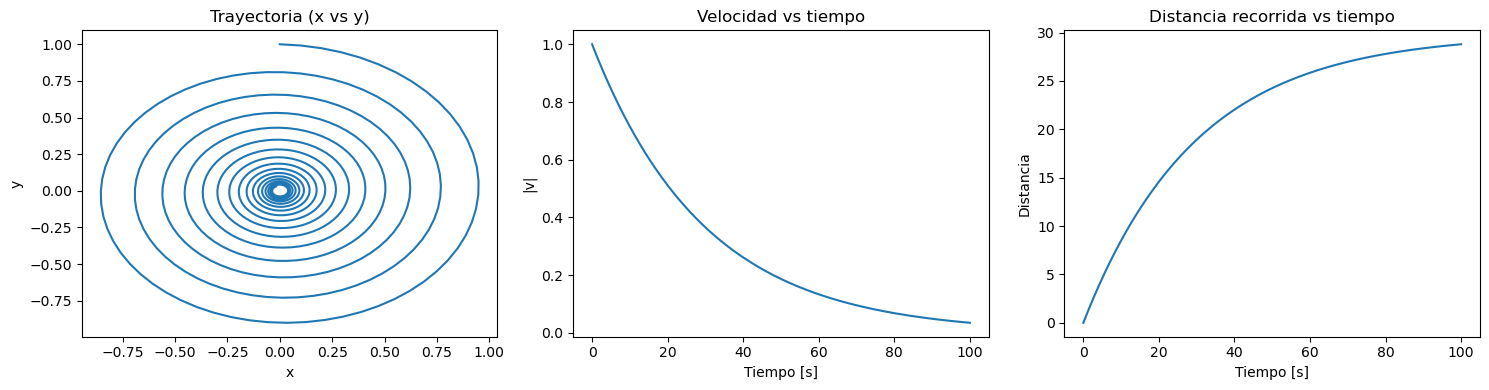

In [45]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


a_val = 0.9


x_expr = a_val**(t/sp.pi) * sp.sin(t)
y_expr = a_val**(t/sp.pi) * sp.cos(t)
v_mag_expr = a_val**(t/sp.pi) * sp.sqrt(1 + (sp.log(a_val)/sp.pi)**2)
dist_expr = sp.integrate(v_mag_expr, t)  


x_func = sp.lambdify(t, x_expr, "numpy")
y_func = sp.lambdify(t, y_expr, "numpy")
v_func = sp.lambdify(t, v_mag_expr, "numpy")
dist_func = sp.lambdify(t, dist_expr, "numpy")

t_num = np.linspace(0, 100, 1000)

x_num = x_func(t_num)
y_num = y_func(t_num)
v_num = v_func(t_num)
dist_num = dist_func(t_num) - dist_func(0)  

fig, axs = plt.subplots(1, 3, figsize=(15, 4))


axs[0].plot(x_num, y_num)
axs[0].set_title("Trayectoria (x vs y)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].plot(t_num, v_num)
axs[1].set_title("Velocidad vs tiempo")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("|v|")


axs[2].plot(t_num, dist_num)
axs[2].set_title("Distancia recorrida vs tiempo")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Distancia")

plt.tight_layout()
plt.show()
